In [2]:
import pandas as pd
import xml.etree.ElementTree as ET
from astropy.io import fits
import pyfits
from astropy.io.votable import parse
from astropy.io.votable import parse_single_table
from astropy.io.votable.tree import VOTableFile, Resource, Table, Field



In [3]:
# Import required packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm

%matplotlib inline
%config InlineBackend.figure_format='svg'

# science plot

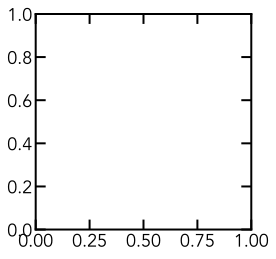

In [4]:
import matplotlib.font_manager as fm
# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]


# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Generate 2 colors from the 'tab10' colormap
colors = cm.get_cmap('tab10', 2)



# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(3, 3))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])


# Hide the top and right spines of the axis
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


In [ ]:
# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(3, 3))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])


# Hide the top and right spines of the axis
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

# Plot the two sample absorbances, using previously generated colors
ax.plot(wavelength, samp_1_abs, linewidth=2, color=colors(0), label='Sample 1')
ax.plot(wavelength, samp_2_abs, linewidth=2, color=colors(1), label='Sample 2')

# Set the axis limits
ax.set_xlim(370, 930)
ax.set_ylim(-0.2, 2.2)

# Edit the major and minor tick locations
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))

# Add the x and y-axis labels
ax.set_xlabel('Wavelength (nm)', labelpad=10)
ax.set_ylabel('Absorbance (O.D.)', labelpad=10)

# Add the x-axis label with λ for wavelength
ax.set_xlabel(r'$\mathregular{\lambda}$ (nm)', labelpad=10)

# Create new axes object by cloning the y-axis of the first plot
ax2 = ax.twiny()
# Edit the tick parameters of the new x-axis
ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax2.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

# Function to convert energy (eV) to wavelength (nm)
def E_to_WL(E):
    return [1240/i for i in E]

# Add ticks manually to energy axis
ax2.xaxis.set_major_locator(mpl.ticker.FixedLocator(E_to_WL(np.linspace(1.5, 3.0, 4))))
ax2.xaxis.set_minor_locator(mpl.ticker.FixedLocator(E_to_WL(np.linspace(1.4, 3.2, 19))))

# Add tick labels manually to energy axis
ax2.set_xticklabels(['1.5', '2.0', '2.5', '3.0'])

# Add energy axis label
ax2.set_xlabel('Energy (eV)', labelpad=10)
# Set energy axis limits
ax2.set_xlim(370, 930)

# Add legend to plot
ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)

# Save figure
plt.savefig('Final_Plot.png', dpi=300, transparent=False, bbox_inches='tight')

# Show figure
#plt.show()

table['obs_title']

# CygX-3

## CygX-3 mwa 10degree

In [60]:
path = '/Users/brettlv/Downloads/mwa_paper/mwa_cover/CygX-3/CygX-3_10degree.xml'
votable = parse(path)
table = parse_single_table(path).to_table()

In [61]:
table.colnames

['obs_id',
 'starttime',
 'stoptime',
 'duration',
 'starttime_mjd',
 'stoptime_mjd',
 'starttime_utc',
 'stoptime_utc',
 'starttime_mro',
 'stoptime_mro',
 'obsname',
 'creator',
 'modtime',
 'mode',
 'projectid',
 'projectshortname',
 'projectdescription',
 'dataquality',
 'dataqualityname',
 'dataqualitycomment',
 'deleted_flag',
 'vcs_recombined_flag',
 'int_time',
 'freq_res',
 'ra',
 'dec',
 'ra_pointing',
 'dec_pointing',
 'ra_phase_center',
 'dec_phase_center',
 'azimuth_pointing',
 'elevation_pointing',
 'azimuth',
 'elevation',
 'sky_temp',
 'calibration',
 'calibrators',
 'gridpoint_name',
 'gridpoint_number',
 'local_sidereal_time_deg',
 'sun_elevation',
 'sun_pointing_distance',
 'jupiter_pointing_distance',
 'moon_pointing_distance',
 'first_channel_number',
 'center_channel_number',
 'last_channel_number',
 'first_channel_lowest_frequency_mhz',
 'center_frequency_mhz',
 'last_channel_highest_frequency_mhz',
 'channels_are_contiguous',
 'channel_count',
 'channel_width_mh

In [62]:
table[[table['projectid']=='D0011']] 

/Users/brettlv/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:3172: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/brettlv/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:3204: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



obs_id,starttime,stoptime,duration,starttime_mjd,stoptime_mjd,starttime_utc,stoptime_utc,starttime_mro,stoptime_mro,obsname,creator,modtime,mode,projectid,projectshortname,projectdescription,dataquality,dataqualityname,dataqualitycomment,deleted_flag,vcs_recombined_flag,int_time,freq_res,ra,dec,ra_pointing,dec_pointing,ra_phase_center,dec_phase_center,azimuth_pointing,elevation_pointing,azimuth,elevation,sky_temp,calibration,calibrators,gridpoint_name,gridpoint_number,local_sidereal_time_deg,sun_elevation,sun_pointing_distance,jupiter_pointing_distance,moon_pointing_distance,first_channel_number,center_channel_number,last_channel_number,first_channel_lowest_frequency_mhz,center_frequency_mhz,last_channel_highest_frequency_mhz,channels_are_contiguous,channel_count,channel_width_mhz,mwa_array_configuration,vcs_files_raw_total,vcs_files_raw_archived,vcs_files_ics_archived,vcs_files_tar_archived,gpubox_files_total,gpubox_files_archived,flag_files_exist,total_archived_data_bytes,files_deleted,files_deleted_bytes,data_files_summary
int64,int64,int64,int32,float32,float32,object,object,object,object,bytes255,bytes255,object,bytes50,bytes50,bytes255,bytes255,int32,bytes255,bytes2048,bool,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bytes255,bytes50,int32,float32,float32,float32,float32,float32,int32,int32,int32,float32,float32,float32,bool,int32,float32,object,int64,int64,int64,int64,int64,int64,bool,int64,int64,int64,bytes255
1137039136,1137039136,1137039336,200,57404.176,57404.176,2016-01-17T04:11:59.000Z,2016-01-17T04:15:19.000Z,2016-01-17T12:11:59.000Z,2016-01-17T12:15:19.000Z,CygA,jmorgan,2019-05-16T02:47:02.291Z,HW_LFILES,D0011,IPS,Interplanetary Scintillation observations.,1,Good,,False,False,0.5,40.0,295.58157,44.779457,295.58157,44.779457,299.868,40.7339,0.0,18.4768,0.0,18.4768,537.5862,True,CygA,sweet,185,295.70032,83.620865,65.72458,108.74504,86.122444,57,68,132,72.32,86.4,169.6,False,24,1.28,Phase I,0,0,0,0,96,96,True,79130295571,0,0,96
1137040336,1137040336,1137040536,200,57404.188,57404.19,2016-01-17T04:31:59.000Z,2016-01-17T04:35:19.000Z,2016-01-17T12:31:59.000Z,2016-01-17T12:35:19.000Z,CygA,jmorgan,2019-05-16T02:47:02.291Z,HW_LFILES,D0011,IPS,Interplanetary Scintillation observations.,1,Good,,False,False,0.5,40.0,300.59134,44.772343,300.59134,44.772343,299.868,40.7339,0.0,18.4768,0.0,18.4768,521.2079,True,CygA,sweet,185,300.71402,83.810814,65.703545,111.87772,82.682884,57,68,132,72.32,86.4,169.6,False,24,1.28,Phase I,0,0,0,0,96,96,True,79132512897,0,0,96
1137043696,1137043696,1137043896,200,57404.227,57404.23,2016-01-17T05:27:59.000Z,2016-01-17T05:31:19.000Z,2016-01-17T13:27:59.000Z,2016-01-17T13:31:19.000Z,CygA,jmorgan,2019-05-16T02:47:02.291Z,HW_LFILES,D0011,IPS,Interplanetary Scintillation observations.,1,Good,,False,False,0.5,40.0,304.8616,45.60795,304.8616,45.60795,299.868,40.7339,352.875,17.0922,352.875,17.0922,488.35922,True,CygA,sweet,196,314.75235,74.06838,66.763916,113.975845,79.843445,57,68,132,72.32,86.4,169.6,False,24,1.28,Phase I,0,0,0,0,96,96,True,79079128530,0,0,96
1137727392,1137727392,1137727448,56,57412.14,57412.14,2016-01-25T03:22:55.000Z,2016-01-25T03:23:51.000Z,2016-01-25T11:22:55.000Z,2016-01-25T11:23:51.000Z,CygA,jmorgan,2019-05-16T02:47:02.291Z,HW_LFILES,D0011,IPS,Interplanetary Scintillation observations.,1,Good,,False,False,0.5,40.0,300.931,45.613903,300.931,45.613903,299.868,40.7339,7.125,17.0922,7.125,17.0922,529.9031,True,CygA,sweet,189,291.28537,73.74805,64.99446,111.700874,119.228004,57,68,132,72.32,86.4,169.6,False,24,1.28,Phase I,0,0,0,0,24,24,True,20274080817,0,0,24
1137732016,1137732016,1137732072,56,57412.195,57412.195,2016-01-25T04:39:59.000Z,2016-01-25T04:40:55.000Z,2016-01-25T12:39:59.000Z,2016-01-25T12:40:55.000Z,CygA,jmorgan,2019-05-16T02:47:02.291Z,HW_LFILES,D0011,IPS,Interplanetary Scintillation observations.,1,Good,,False,False,0.5,40.0,300.71765,45.6142,300.71765,45.6142,299.868,40.7339,352.875,17.0922,352

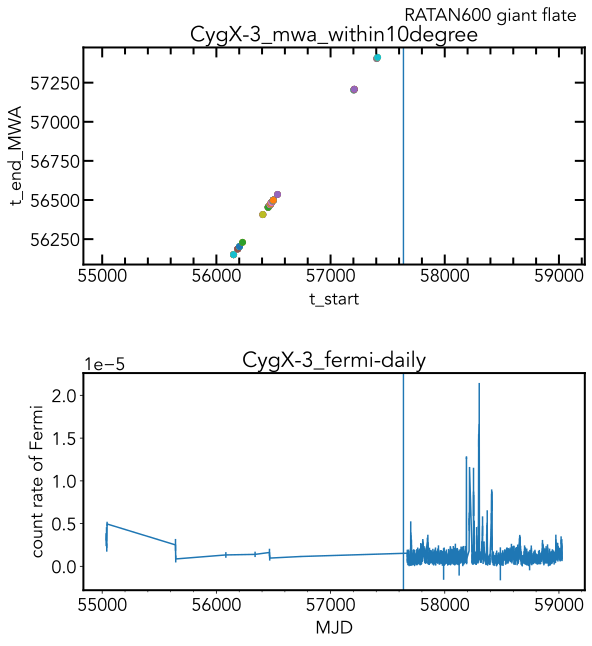

In [68]:
table[[table['projectid']=='D0000']] 

/Users/brettlv/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:3172: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/brettlv/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:3204: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



obs_id,starttime,stoptime,duration,starttime_mjd,stoptime_mjd,starttime_utc,stoptime_utc,starttime_mro,stoptime_mro,obsname,creator,modtime,mode,projectid,projectshortname,projectdescription,dataquality,dataqualityname,dataqualitycomment,deleted_flag,vcs_recombined_flag,int_time,freq_res,ra,dec,ra_pointing,dec_pointing,ra_phase_center,dec_phase_center,azimuth_pointing,elevation_pointing,azimuth,elevation,sky_temp,calibration,calibrators,gridpoint_name,gridpoint_number,local_sidereal_time_deg,sun_elevation,sun_pointing_distance,jupiter_pointing_distance,moon_pointing_distance,first_channel_number,center_channel_number,last_channel_number,first_channel_lowest_frequency_mhz,center_frequency_mhz,last_channel_highest_frequency_mhz,channels_are_contiguous,channel_count,channel_width_mhz,mwa_array_configuration,vcs_files_raw_total,vcs_files_raw_archived,vcs_files_ics_archived,vcs_files_tar_archived,gpubox_files_total,gpubox_files_archived,flag_files_exist,total_archived_data_bytes,files_deleted,files_deleted_bytes,data_files_summary
int64,int64,int64,int32,float32,float32,object,object,object,object,bytes255,bytes255,object,bytes50,bytes50,bytes255,bytes255,int32,bytes255,bytes2048,bool,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bytes255,bytes50,int32,float32,float32,float32,float32,float32,int32,int32,int32,float32,float32,float32,bool,int32,float32,object,int64,int64,int64,int64,int64,int64,bool,int64,int64,int64,bytes255
1061994824,1061994824,1061994936,112,56535.605,56535.61,2013-08-31T14:33:28.000Z,2013-08-31T14:35:20.000Z,2013-08-31T22:33:28.000Z,2013-08-31T22:35:20.000Z,CygA_93,Randall,2019-05-16T02:47:02.291Z,HW_LFILES,D0000,Unspecified Director's time,Catch-all for Director's time observations that don't have a project ID.,1,Good,,False,False,0.5,40.0,305.0849,45.61165,305.0849,45.61165,299.868,40.7339,352.875,17.0922,352.875,17.0922,968.11224,True,CygA,sweet,196,314.9723,-60.08208,117.57194,109.34916,113.21322,81,92,104,103.04,117.12,133.76,True,24,1.28,Phase I,0,0,0,0,48,48,True,45088421090,0,0,48
1061994944,1061994944,1061995056,112,56535.61,56535.61,2013-08-31T14:35:28.000Z,2013-08-31T14:37:20.000Z,2013-08-31T22:35:28.000Z,2013-08-31T22:37:20.000Z,CygA_121,Randall,2019-05-16T02:47:02.291Z,HW_LFILES,D0000,Unspecified Director's time,Catch-all for Director's time observations that don't have a project ID.,1,Good,,False,False,0.5,40.0,305.58585,45.611134,305.58585,45.611134,299.868,40.7339,352.875,17.0922,352.875,17.0922,488.35922,True,CygA,sweet,196,315.47366,-60.454994,117.793686,109.230095,113.09073,109,120,132,138.88,152.96,169.6,True,24,1.28,Phase I,0,0,0,0,48,48,True,45101525623,0,0,48
1061995064,1061995064,1061995176,112,56535.61,56535.61,2013-08-31T14:37:28.000Z,2013-08-31T14:39:20.000Z,2013-08-31T22:37:28.000Z,2013-08-31T22:39:20.000Z,CygA_145,Randall,2019-05-16T02:47:02.291Z,HW_LFILES,D0000,Unspecified Director's time,Catch-all for Director's time observations that don't have a project ID.,1,Good,,False,False,0.5,40.0,306.08676,45.610622,306.08676,45.610622,299.868,40.7339,352.875,17.0922,352.875,17.0922,305.08762,True,CygA,sweet,196,315.97504,-60.821976,118.01125,109.10934,112.9667,133,144,156,169.6,183.68001,200.31999,True,24,1.28,Phase I,0,0,0,0,48,48,True,45324797884,0,0,48
1119721848,1119721848,1119721960,112,57203.742,57203.746,2015-06-30T17:50:32.000Z,2015-06-30T17:52:24.000Z,2015-07-01T01:50:32.000Z,2015-07-01T01:52:24.000Z,CygA_69,rwayth,2019-05-16T02:47:02.291Z,HW_LFILES,D0000,Unspecified Director's time,Catch-all for Director's time observations that don't have a project ID.,1,Good,,False,False,2.0,10.0,302.64813,44.772297,302.64813,44.772297,299.868,40.7339,0.0,18.4768,0.0,18.4768,2169.446,False,,sweet,185,302.78366,-68.52713,108.75005,116.959656,73.86713,57,68,80,72.32,86.4,103.04,True,24,1.28,Phase I,0,0,0,0,24,24,True,43805744978,0,0,24
1119721968,1119721968,1119722080,112,57203.746,57203.746,2015-06-30T17:52:32.000Z,2015-06-30T1

In [75]:
for i in table[[table['projectid']=='D0000']]['obs_id']:
    print(i)

1061994824
1061994944
1061995064
1119721848
1119721968
1119722088
1119722208
1119722328
1120066504
1120066624
1120066744
1120066864
1120066984


/Users/brettlv/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:3172: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/brettlv/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:3204: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



In [73]:
table[[table['projectid']=='C100']] 

/Users/brettlv/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:3172: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/brettlv/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:3204: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



obs_id,starttime,stoptime,duration,starttime_mjd,stoptime_mjd,starttime_utc,stoptime_utc,starttime_mro,stoptime_mro,obsname,creator,modtime,mode,projectid,projectshortname,projectdescription,dataquality,dataqualityname,dataqualitycomment,deleted_flag,vcs_recombined_flag,int_time,freq_res,ra,dec,ra_pointing,dec_pointing,ra_phase_center,dec_phase_center,azimuth_pointing,elevation_pointing,azimuth,elevation,sky_temp,calibration,calibrators,gridpoint_name,gridpoint_number,local_sidereal_time_deg,sun_elevation,sun_pointing_distance,jupiter_pointing_distance,moon_pointing_distance,first_channel_number,center_channel_number,last_channel_number,first_channel_lowest_frequency_mhz,center_frequency_mhz,last_channel_highest_frequency_mhz,channels_are_contiguous,channel_count,channel_width_mhz,mwa_array_configuration,vcs_files_raw_total,vcs_files_raw_archived,vcs_files_ics_archived,vcs_files_tar_archived,gpubox_files_total,gpubox_files_archived,flag_files_exist,total_archived_data_bytes,files_deleted,files_deleted_bytes,data_files_summary
int64,int64,int64,int32,float32,float32,object,object,object,object,bytes255,bytes255,object,bytes50,bytes50,bytes255,bytes255,int32,bytes255,bytes2048,bool,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bytes255,bytes50,int32,float32,float32,float32,float32,float32,int32,int32,int32,float32,float32,float32,bool,int32,float32,object,int64,int64,int64,int64,int64,int64,bool,int64,int64,int64,bytes255
1028726352,1028726352,1028726472,120,56150.555,56150.555,2012-08-11T13:18:56.000Z,2012-08-11T13:20:56.000Z,2012-08-11T21:18:56.000Z,2012-08-11T21:20:56.000Z,CygA_93,Randall,2019-05-16T02:47:02.291Z,HW_LFILES,C100,Instrument Verification Program,Short (~2min) scans on strong calibrator sources. Freq: 80-250 MHz. LST range: all. Subarrays: all,1,Good,,False,False,1.0,40.0,301.85443,33.20359,301.85443,33.20359,299.86816,40.733917,23.1986,25.4582,23.1986,25.4582,0.0,False,,sweet,177,--,-46.725792,128.17879,106.56399,104.535805,81,92,104,103.04,117.12,133.76,True,24,1.28,Commissioning,0,0,0,0,3,3,False,3114901440,0,0,3
1028729176,1028729176,1028729296,120,56150.59,56150.59,2012-08-11T14:06:00.000Z,2012-08-11T14:08:00.000Z,2012-08-11T22:06:00.000Z,2012-08-11T22:08:00.000Z,CygA_93,Randall,2019-05-16T02:47:02.291Z,HW_LFILES,C100,Instrument Verification Program,Short (~2min) scans on strong calibrator sources. Freq: 80-250 MHz. LST range: all. Subarrays: all,1,Good,,False,False,1.0,40.0,298.27545,45.623512,298.27545,45.623512,299.86816,40.733917,7.125,17.0922,7.125,17.0922,0.0,False,,sweet,189,--,-57.06795,115.73865,100.10223,98.81425,81,92,104,103.04,117.12,133.76,True,24,1.28,Commissioning,0,0,0,0,3,3,False,3114901440,0,0,3
1028729352,1028729352,1028729472,120,56150.59,56150.59,2012-08-11T14:08:56.000Z,2012-08-11T14:10:56.000Z,2012-08-11T22:08:56.000Z,2012-08-11T22:10:56.000Z,CygA_117,Randall,2019-05-16T02:47:02.291Z,HW_LFILES,C100,Instrument Verification Program,Short (~2min) scans on strong calibrator sources. Freq: 80-250 MHz. LST range: all. Subarrays: all,1,Good,,False,False,1.0,40.0,299.0103,45.622757,299.0103,45.622757,299.86816,40.733917,7.125,17.0922,7.125,17.0922,0.0,False,,sweet,189,--,-57.69887,115.95265,99.742615,98.45433,105,116,128,133.76,147.84,164.48,True,24,1.28,Commissioning,0,0,0,0,3,3,False,3114901440,0,0,3
1028729536,1028729536,1028729656,120,56150.594,56150.594,2012-08-11T14:12:00.000Z,2012-08-11T14:14:00.000Z,2012-08-11T22:12:00.000Z,2012-08-11T22:14:00.000Z,CygA_141,Randall,2019-05-16T02:47:02.291Z,HW_LFILES,C100,Instrument Verification Program,Short (~2min) scans on strong calibrator sources. Freq: 80-250 MHz. LST range: all. Subarrays: all,1,Good,,False,False,1.0,40.0,299.77853,45.62197,299.77853,45.62197,299.86816,40.733917,7.125,17.0922,7.125,17.0922,0.0,False,,sweet,189,--,-58.364006,116.1723,99.358444,98.07036,129,140,152,164.48,178.56,195.2,True,24,1.28,Commissioning,0,0,0,0,3,3,False,3114901440,0,0,3
1028734936,1028734

## CygX-3 Fermi 

In [64]:
ls /Users/brettlv/Downloads/mwa_paper/mwa_cover/CygX-3/

CygX-3_10degree.xml  CygnusX-3_86400.lc
CygnusX-3_604800.lc  fermi.html


In [65]:
gamma_week_path='/Users/brettlv/Downloads/mwa_paper/mwa_cover/CygX-3/CygnusX-3_604800.lc'
gamma_day_path='/Users/brettlv/Downloads/mwa_paper/mwa_cover/CygX-3/CygnusX-3_86400.lc'
lightcurve_day=pyfits.open(gamma_day_path)

In [7]:
lightcurve_day[0]

In [8]:
lightcurve_day.info()

Filename: /Users/brettlv/Downloads/CygX-3/CygnusX-3_86400.lc
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1    LIGHTCURVES  BinTableHDU    978   1284R x 16C   [D, D, 10A, E, E, E, E, L, E, E, L, E, E, L, E, E]   


In [9]:
lightcurve_day[1].header['MJDREFI']

51910.0

In [10]:
lightcurve_day[1].header['MJDREFF']

'7.428703703703703D-4'

In [66]:
time_day=lightcurve_day[1].data['START']
count_day=lightcurve_day[1].data['FLUX_100_300000']
counterr_day=lightcurve_day[1].data['ERROR_100_300000']
during_day=lightcurve_day[1].data['DURATION']
t_day=time_day/86400+lightcurve_day[1].header['MJDREFI']+7.428703703703703e-4

## Cyg X-3_30degree

In [ ]:
b'GLEAM'
b'Detecting Molecular Lines with the MWA'
b'Searching for SGR 1935+2154 in radio'
b'Instrument Verification Program'
b'Meridian Snapshot Survey'
b'IPS'
b'Searching for pulsars in the image domain: pilot study'
b'Shadowing Parkes FRB observations'
b'All-sky scan test'

## projectlist

In [71]:
project_lists=[]
for i in table['projectid']:
    if not i in project_lists:
        project_lists.append(i)
    

In [72]:
project_lists

['C100', 'D0000', 'D0011']

In [67]:
import plotly_express as px

data_fermi=pd.DataFrame({'t':t_day,'flux':count_day,'err':counterr_day},index=None,columns=['t','flux','err'])    



fig = px.scatter(data_fermi, x='t',y='flux',error_y='err',
                 hover_name="t",size_max=15)


fig.update_xaxes(tickformat= "0.5f",nticks=4,type="linear",title_text="MJD")
fig.update_yaxes(tickformat= "0.2e",nticks=10,type="linear",title_text="flux")
fig.update_layout(title_text="", width = 800,height = 600)
#fig.update_xaxes(range=[np.log10(2e-4),np.log10(1e-2)])
#fig.update_yaxes(range=[1.0,2.5])
fig.show()
#fig.write_image('xray-paper-g-eddrate.gif')
#fig.write_image('xray-paper-g-eddrate.png')
fig.write_html('/Users/brettlv/Downloads/mwa_paper/mwa_cover/CygX-3/fermi.html')

## time convert

In [76]:
from datetime import timedelta, datetime
from astropy.time import Time
def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()

In [ ]:
convert_xaxis_mjd(time)

In [81]:
convert_xaxis_time(55516),convert_xaxis_time(55563),convert_xaxis_time(58329)

(datetime.datetime(2010, 11, 16, 0, 0),
 datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2018, 7, 30, 0, 0))

# timecover

In [ ]:
# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(9, 10))
# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax=fig.add_subplot(211)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1000))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(200))
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')



for i,j in zip(table['starttime_mjd'],table['stoptime_mjd']):
    ax.scatter(i,j)
    
ax2=fig.add_subplot(212,sharex=ax)    
ax2.errorbar(t_day,count_day,counterr_day)    
    
ax.set_xlabel('t_start')
ax.set_ylabel('t_end_MWA')

ax2.set_xlabel('MJD')
ax2.set_ylabel('count rate of Fermi')

#ax.axvline(57644.5)
#ax2.axvline(57644.5)
ax.axvspan(57632,57644.5)
ax2.axvspan(57632,57644.5)
ax.text(57644.5,57645,'RATAN600 giant flate')
ax2.set_title('CygX-3_fermi-daily') 
ax.set_title('CygX-3_mwa_within10degree')
plt.subplots_adjust(hspace = 0.5)
plt.savefig('/Users/brettlv/Downloads/mwa_paper/mwa_cover/CygX-3_10degree.png')

# fits image

In [5]:
integrated_I='/Users/brettlv/Downloads/mwa_paper/mwa_cover/CygX-3/integrated-stokes-I.fits'
data_I=pyfits.open(integrated_I)

In [7]:
data_I.info()

Filename: /Users/brettlv/Downloads/mwa_paper/mwa_cover/CygX-3/integrated-stokes-I.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      48   (4500, 4500, 1, 1)   float32   


In [9]:
data_I[0].data

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]]], dtype=float32)